# Practical 8 (Part I) - Recommender System (Simple Recommendation)

Simple recommenders offer generalized recommendations to every user, based on movie popularity and/or genre. The basic idea behind this system is that movies that are more popular and critically acclaimed will have a higher probability of being liked by the average audience. An example could be IMDB Top 250.

This practical helps you to learn how to build a basic model of simple recommender systems using the Movies Data set that is publicly available on Kaggle.

Reference: 

Full dataset can be downloaded here: https://www.kaggle.com/rounakbanik/the-movies-dataset?select=movies_metadata.csv

The reference of this practical: https://www.datacamp.com/community/tutorials/recommender-systems-python


## Section 1 Data Preparation

"movies_metadata.csv" contains information on ~45,000 movies featured in the Full MovieLens dataset. Features include posters, backdrops, budget, genre, revenue, release dates, languages, production countries, and companies.

1. Let's load your movies metadata dataset into a pandas DataFrame:

In [ ]:
# Import Pandas
import                                         #pandas as pd

# Load Movies Metadata
metadata = pd.read_csv('', low_memory=True)   #read file

# Print the first three rows
metadata.head()

In [ ]:
metadata.shape

There are 45466 rows and 24 columns

2.  let's calculate the value of the mean rating across all movies using the pandas .mean() function:

In [ ]:
# Calculate mean of vote average column
C = metadata['']                         # to calculate the mean of "vote_average" using .mean()
print(C)

From the above output, you can observe that the average rating of a movie is around 5.6 (on a scale of 10).

3. Next, let's calculate the number of votes, m, received by a movie in the 90th percentile.

In [ ]:
# Calculate the minimum number of votes required to be in the chart, m

m = metadata[''].              #use .quantile(0.9) method from pandas library to identify threshold for reliable min vote_count
print(m)

4. Now we can simply use a greater than equal to condition to filter out movies having greater than equal to 160 vote counts. 

In [ ]:
# Filter out all qualified movies into a new DataFrame
#The .copy() method ensures that the new q_movies DataFrame is independent of the original metadata DataFrame. 
# In other words, any changes made to the q_movies DataFrame will not affect the original metadata data frame
q_movies = metadata.copy().loc[metadata['vote_count'] >= m]
q_movies.shape


There are 4555 movies with at least 160 votes

## Section 2 Calculate the Weighted Rating

5. Next and the most important step is to calculate the weighted rating for each qualified movie. To do this, you will:

(i) Define a function, weighted_rating(); The formula is as follows:
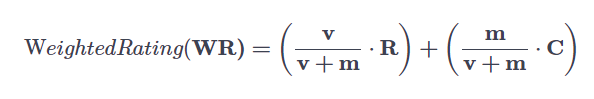

(ii) Since we already have calculated m and C we will simply pass them as an argument to the function;

(iii) Then we will select the vote_count(v) and vote_average(R) column from the q_movies data frame;

(iv) Finally, we will compute the weighted average and return the result.

In [ ]:
# Function that computes the weighted rating of each movie
def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    # Calculation based on the IMDB formula
    return                                              # return the weighted rating using equation (v/(v+m) * R) + (m/(m+v) * C)

6. Next, we generate a new feature "score" to store the weighted_rating for each movie

In [ ]:
# Define a new feature 'score' and calculate its value with `weighted_rating()`
q_movies['weighted_rating'] = q_movies.apply(weighted_rating, axis=1)
q_movies['weighted_rating'].head()

7. Finally, let's sort the DataFrame in descending order based on the score feature column and output the title, vote count, vote average, and weighted rating (score) of the top 20 movies.

In [ ]:
#Sort movies based on score calculated above
q_movies = q_movies.sort_values('weighted_rating', ascending=False)

#Print the top 15 movies
q_movies[['title', 'vote_count', 'vote_average', 'weighted_rating']].head(20)

This chart shows the top 20 popular movies with high rating. Simple recommender is suitable for new users who did not have any interaction history in the system.

Next. Let's explore Content-Based Filtering